In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "/content/drive/MyDrive/DS307/Dataset/"

## Combine data

In [ ]:
luong_data = pd.read_csv(PATH + "project-4-at-2024-12-10-22-02-6210c191.csv")

In [ ]:
luong_data

,Fixed_Comment,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,Xem và cảm_thấy thương cha_ông biết_bao,3,1,2024-12-09T13:56:37.253100Z,1,4.949,Thankful,2024-12-09T13:56:37.254100Z
1,Cái giá của hoà_bình cao quá các bác ơi,4,1,2024-12-09T14:01:04.432787Z,2,12.627,Sad,2024-12-09T14:01:04.432787Z
2,Tôi vào trận cùng quân_đoàn 2 năm 72 mùa hè đỏ...,5,1,2024-12-09T14:01:30.437763Z,3,13.818,Proud,2024-12-09T14:01:30.437763Z
3,Đại_tướng Võ_Nguyên Giáp đánh trận Điện_Biên_P...,6,1,2024-12-09T14:01:39.688078Z,4,7.870,Thankful,2024-12-09T14:01:39.688078Z
4,Trong Chiến_Dịch này Đảng_Ta đã phải hy_sinh í...,7,1,2024-12-09T14:01:48.631746Z,5,7.704,Thankful,2024-12-09T14:01:48.631746Z
...,...,...,...,...,...,...,...,...
2737,Cứ_điểm Làng Vây phải không ông Chỉ_huy do Thi...,2740,1,2024-12-10T15:00:49.595087Z,2738,4.783,Neutral,2024-12-10T15:00:49.595087Z
2738,ducanhhoang5267 mình thấy cũng lạ những người ...,2741,1,2024-12-10T15:00:51.716176Z,2739,1.715,Neutral,2024-12-10T15:00:51.716176Z
2739,THUA flexed_biceps flexed_biceps flexed_biceps...,2742,1,2024-12-10T15:00:53.240758Z,2740,1.118,Neutral,2024-12-10T15:00:53.240758Z
2740,cảm_ơn Bác Hồ cảm_ơn Đảng và nhà_nước với mấy ...,2743,1,2024-12-10T15:00:54.978252Z,2741,1.321,Proud,2024-12-10T15:00:54.978252Z


In [ ]:
luong_data['sentiment'].fillna("Proud", inplace = True)

In [ ]:
luong_data = luong_data[['Fixed_Comment', 'sentiment']]

In [ ]:
luong_data.rename(columns={'sentiment': 'label'}, inplace=True)

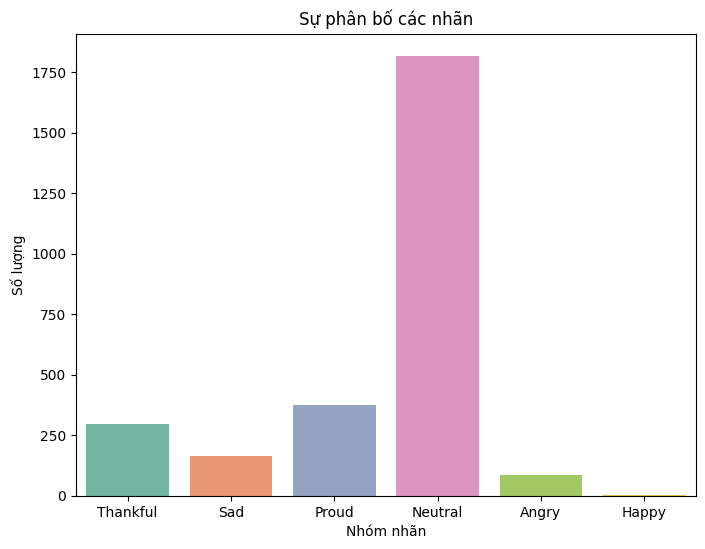

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=luong_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

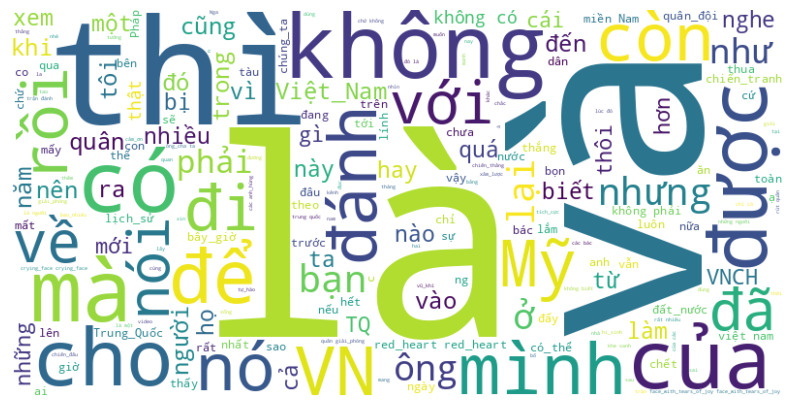

In [ ]:
text_data = ' '.join(luong_data['Fixed_Comment'])

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

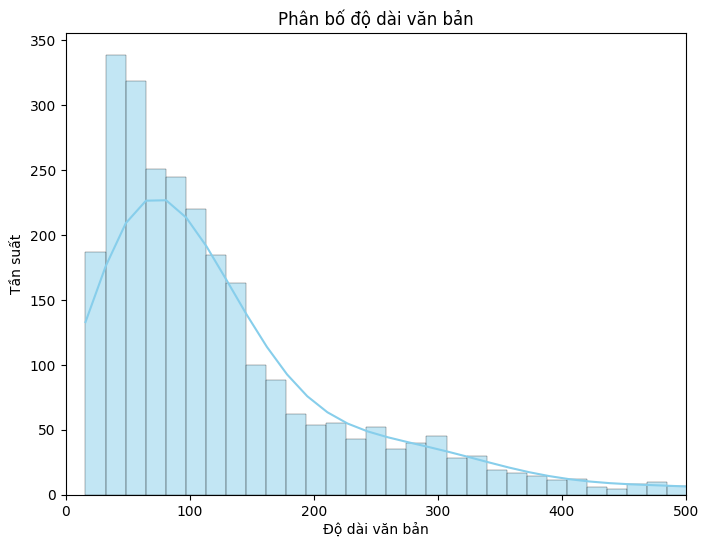

In [ ]:
# Thêm một cột mới là độ dài của từng văn bản
luong_data['text_length'] = luong_data['Fixed_Comment'].apply(len)

# Vẽ biểu đồ phân bố độ dài văn bản
plt.figure(figsize=(8, 6))
sns.histplot(luong_data['text_length'], kde=True, bins=200, color='skyblue')
plt.title('Phân bố độ dài văn bản')
plt.xlim(0, 500)
plt.xlabel('Độ dài văn bản')
plt.ylabel('Tần suất')
plt.show()

In [ ]:
luong_data.rename(columns={'Fixed_Comment': 'text'}, inplace=True)

In [ ]:
an_data = pd.read_excel(PATH + "labeled.xlsx")

In [ ]:
an_data.dropna(inplace = True)

In [ ]:
an_data

,emotion,comment
0,3.0,vị tướng tài_giỏi cao_ráo đẹp_trai nụ cười hiề...
1,0.0,Tấn cong và chiến_thắng Nhủng mệt lăm các đồng...
2,2.0,VN và VN Đánh Giết_Hại Lẫn Nhau Thật Là Khủng_...
3,1.0,34 09 Rõ chút chắc thấy được body 6 múi luôn
4,4.0,Bác tôi cũng đã ngã xuống ở Khe_Sanh Hoà_bình ...
...,...,...
3995,3.0,Có thời_gian ông đi du_lịch Điện_Biên 1 lần nh...
3996,5.0,Video này được ghép lại bởi nhiều video ngắn h...
3997,4.0,Cảm_ơn Bác Cháu chúc Bác Mạnh_khoẻ sống lâu re...
3998,5.0,Đúng là không mang não khi xem clip rồi


In [ ]:
an_data = an_data.rename(columns={'emotion': 'label'})

In [ ]:
an_data = an_data.rename(columns={'comment': 'text'})

In [ ]:
an_data['label'] = an_data['label'].astype(int)

In [ ]:
label_mapping = {
    0: 'Sad',
    1: 'Happy',
    2: 'Angry',
    3: 'Proud',
    4: 'Thankful',
    5: 'Neutral'
}

In [ ]:
an_data['label'] = an_data['label'].map(label_mapping)

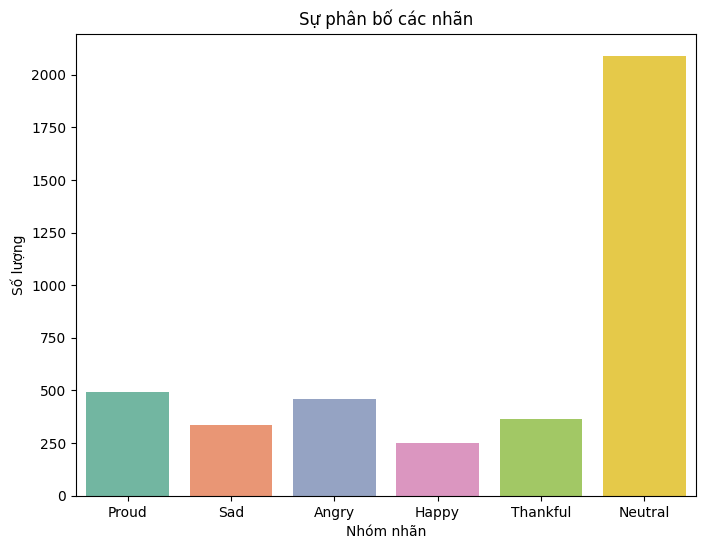

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=an_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

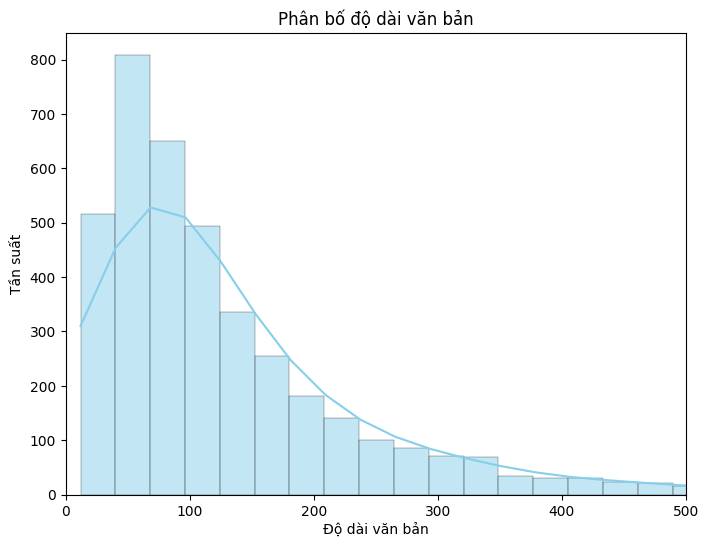

In [ ]:
# Thêm một cột mới là độ dài của từng văn bản
an_data['text_length'] = an_data['text'].apply(len)

# Vẽ biểu đồ phân bố độ dài văn bản
plt.figure(figsize=(8, 6))
sns.histplot(an_data['text_length'], kde=True, bins=200, color='skyblue')
plt.title('Phân bố độ dài văn bản')
plt.xlim(0, 500)
plt.xlabel('Độ dài văn bản')
plt.ylabel('Tần suất')
plt.show()

In [ ]:
thuong_data = pd.read_excel(PATH + "labeled_data.xlsx")

In [ ]:
thuong_data.head(20)

,Fixed_Comment,Label
0,Ông mình cũng tham_gia cuộc_chiến điện biên ph...,2
1,Búa đục đá nặng ít cũng 1 4 không gõ 3000 phát...,1
2,Bọn cướp nước và bán_nước gặp người Việt yêu n...,1
3,Trung_Quốc nó chỉ đánh để lấy lòng Mỹ mà thôi ...,4
4,Quá tự_hào về dân_tộc này Dân_tộc ta là một dâ...,2
5,Anh_em tương_tàn xót_thương thân_phận những ng...,1
6,Vậy_sao dân miền nam không giúp vnch tồn_tại H...,4
7,Thời đó khó_khăn gian_khổ mà sinh ra những con...,4
8,Tự_hào từng là người lính tại e174 f316 trong ...,2
9,Ca m ơn Ba c Hô Chi Minh_Ki nh Yêu va Tươ ng V...,3


In [ ]:
label_mapping = {
    0: 'Sad',
    1: 'Angry',
    2: 'Proud',
    3: 'Thankful',
    4: 'Neutral'
}

In [ ]:
thuong_data = thuong_data.rename(columns={'Fixed_Comment': 'text', 'Label': 'label'})

In [ ]:
thuong_data['label'] = thuong_data['label'].map(label_mapping)

In [ ]:
thuong_data

,text,label
0,Ông mình cũng tham_gia cuộc_chiến điện biên ph...,Proud
1,Búa đục đá nặng ít cũng 1 4 không gõ 3000 phát...,Angry
2,Bọn cướp nước và bán_nước gặp người Việt yêu n...,Angry
3,Trung_Quốc nó chỉ đánh để lấy lòng Mỹ mà thôi ...,Neutral
4,Quá tự_hào về dân_tộc này Dân_tộc ta là một dâ...,Proud
...,...,...
3967,Tuyệt_vời cảm_ơn ad nhiều ạ,Thankful
3968,Chúawibu43 nói_chung chỉ muốn ngồi há miệng ch...,Neutral
3969,không thấy nói đến thương_vong của bộ_đội mk N...,Neutral
3970,Ngày_Xưa Lịch_sử vẻ_vang Còn bây_giờ thì có nh...,Neutral


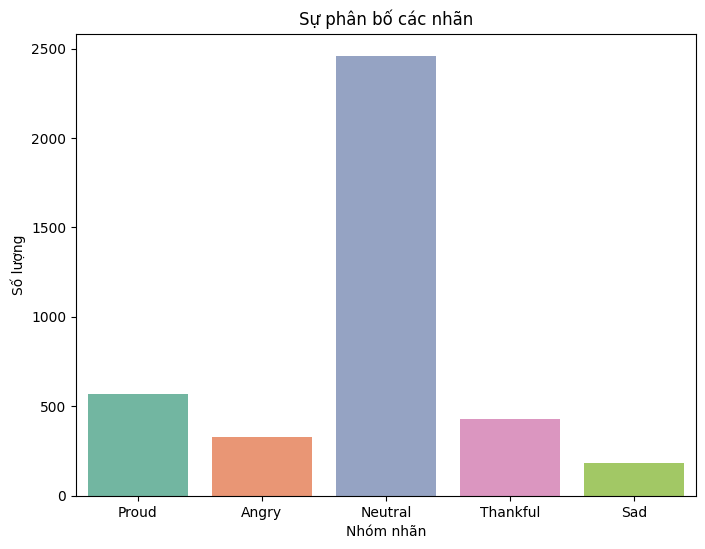

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=thuong_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

In [ ]:
luong_data['label'] = luong_data['label'].replace('Happy', 'Thankful')

In [ ]:
an_data['label'] = an_data['label'].replace('Happy', 'Thankful')

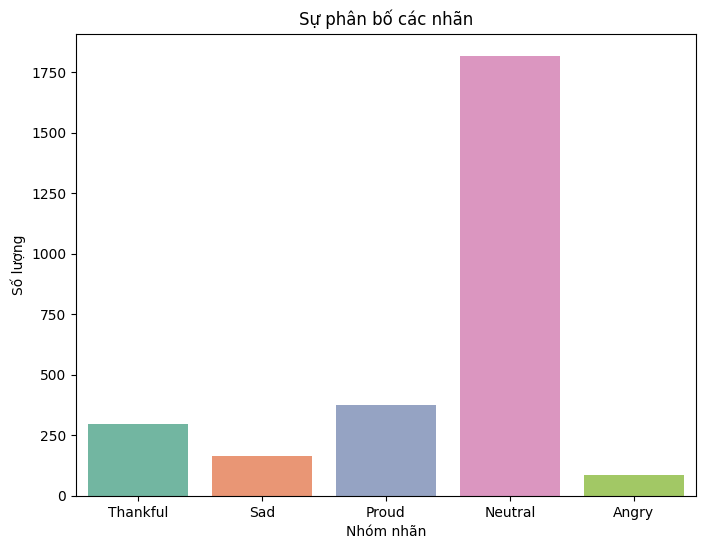

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=luong_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

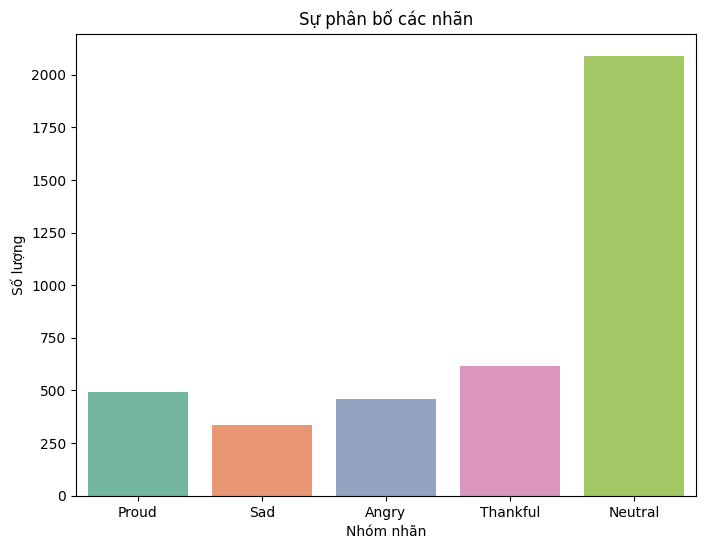

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=an_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

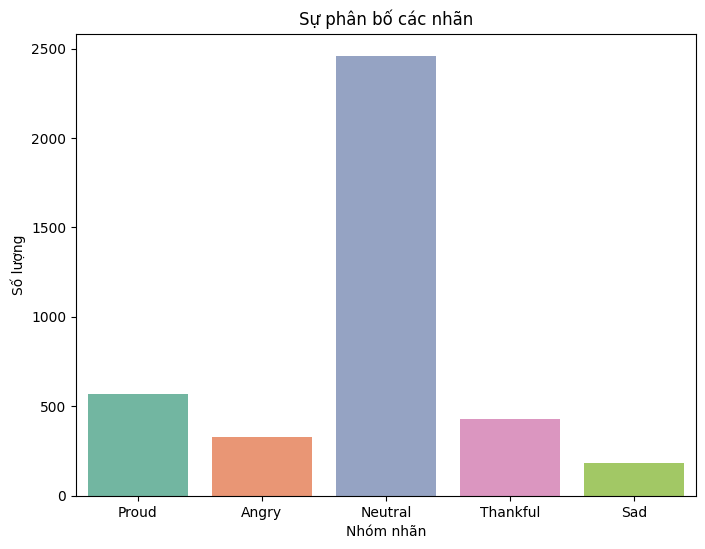

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=thuong_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

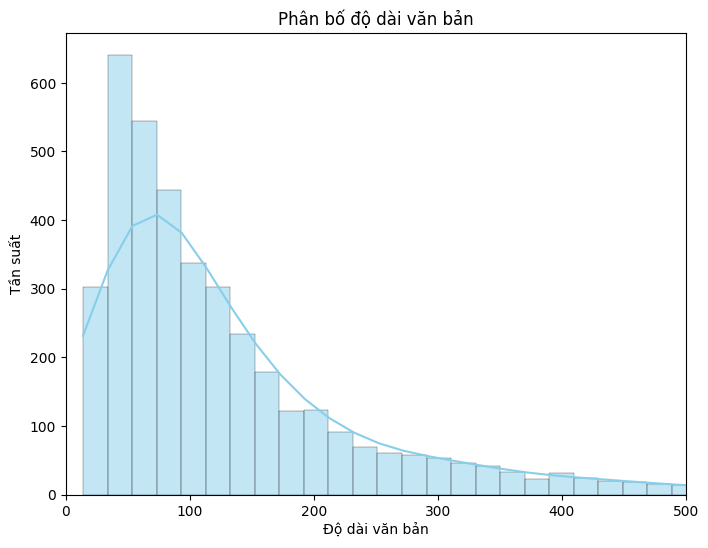

In [ ]:
# Thêm một cột mới là độ dài của từng văn bản
thuong_data['text_length'] = thuong_data['text'].apply(len)

# Vẽ biểu đồ phân bố độ dài văn bản
plt.figure(figsize=(8, 6))
sns.histplot(thuong_data['text_length'], kde=True, bins=200, color='skyblue')
plt.title('Phân bố độ dài văn bản')
plt.xlim(0, 500)
plt.xlabel('Độ dài văn bản')
plt.ylabel('Tần suất')
plt.show()

In [ ]:
final_data = pd.concat([an_data, luong_data, thuong_data], axis=0, ignore_index=True)

In [ ]:
final_data

,label,text,text_length
0,Proud,vị tướng tài_giỏi cao_ráo đẹp_trai nụ cười hiề...,68
1,Sad,Tấn cong và chiến_thắng Nhủng mệt lăm các đồng...,53
2,Angry,VN và VN Đánh Giết_Hại Lẫn Nhau Thật Là Khủng_...,314
3,Thankful,34 09 Rõ chút chắc thấy được body 6 múi luôn,44
4,Thankful,Bác tôi cũng đã ngã xuống ở Khe_Sanh Hoà_bình ...,153
...,...,...,...
10708,Thankful,Tuyệt_vời cảm_ơn ad nhiều ạ,27
10709,Neutral,Chúawibu43 nói_chung chỉ muốn ngồi há miệng ch...,198
10710,Neutral,không thấy nói đến thương_vong của bộ_đội mk N...,877
10711,Neutral,Ngày_Xưa Lịch_sử vẻ_vang Còn bây_giờ thì có nh...,140


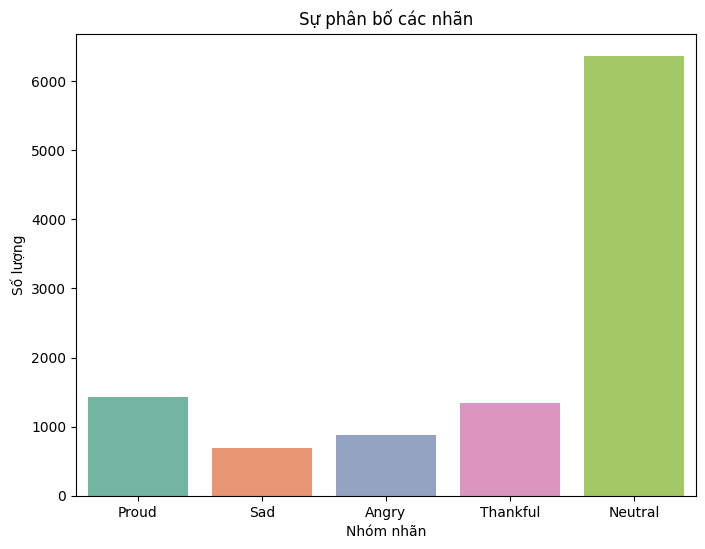

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=final_data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

In [ ]:
final_data['text'] = final_data['text'].str.lower()

In [ ]:
label_mapping = {
    'Sad': 0,
    'Angry': 1,
    'Proud': 2,
    'Thankful': 3,
    'Neutral': 4
}


In [ ]:
final_data['label'] = final_data['label'].map(label_mapping)

In [ ]:
final_data.to_csv(PATH + 'imbalance_dataset.csv', index=False)

## Handle imbalance data

In [ ]:
data = pd.read_csv(PATH + 'imbalance_dataset.csv')

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="wonrax/phobert-base-vietnamese-sentiment")

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
from tqdm import tqdm

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,label,text,text_length
0,2.0,vị tướng tài_giỏi cao_ráo đẹp_trai nụ cười hiề...,68
1,0.0,tấn cong và chiến_thắng nhủng mệt lăm các đồng...,53
2,1.0,vn và vn đánh giết_hại lẫn nhau thật là khủng_...,314
3,3.0,34 09 rõ chút chắc thấy được body 6 múi luôn,44
4,3.0,bác tôi cũng đã ngã xuống ở khe_sanh hoà_bình ...,153
...,...,...,...
10708,3.0,tuyệt_vời cảm_ơn ad nhiều ạ,27
10709,4.0,chúawibu43 nói_chung chỉ muốn ngồi há miệng ch...,198
10710,4.0,không thấy nói đến thương_vong của bộ_đội mk n...,877
10711,4.0,ngày_xưa lịch_sử vẻ_vang còn bây_giờ thì có nh...,140


In [ ]:
sentiments = []
confidences =

for text in tqdm(data['text']):
  try:
    sentiment = pipe(text)[0]['label']
    sentiments.append(sentiment)
  except:
    sentiments.append(np.nan)

100%|██████████| 10712/10712 [25:30<00:00,  7.00it/s]


In [ ]:
data['sentiment'] = sentiments

In [ ]:
data['sentiment'].isna().sum()

89

In [ ]:
data.dropna(inplace = True)

In [ ]:
data['label'] = data['label'].astype(int)

In [ ]:
data

,label,text,text_length,sentiment
0,2,vị tướng tài_giỏi cao_ráo đẹp_trai nụ cười hiề...,68,POS
1,0,tấn cong và chiến_thắng nhủng mệt lăm các đồng...,53,POS
2,1,vn và vn đánh giết_hại lẫn nhau thật là khủng_...,314,NEG
3,3,34 09 rõ chút chắc thấy được body 6 múi luôn,44,POS
4,3,bác tôi cũng đã ngã xuống ở khe_sanh hoà_bình ...,153,POS
...,...,...,...,...
10708,3,tuyệt_vời cảm_ơn ad nhiều ạ,27,POS
10709,4,chúawibu43 nói_chung chỉ muốn ngồi há miệng ch...,198,NEG
10710,4,không thấy nói đến thương_vong của bộ_đội mk n...,877,NEU
10711,4,ngày_xưa lịch_sử vẻ_vang còn bây_giờ thì có nh...,140,NEU


In [ ]:
insults = data[(data['sentiment'] == 'NEG') & (data['label'] == 4) & (data['text_length'] < 100)]

In [ ]:
thankfuls = data[(data['sentiment'] == 'POS') & (data['label'] == 4) & (data['text_length'] < 100)]

In [ ]:
data.loc[insults.index, 'label'] = 5
data.loc[thankfuls.index, 'label'] = 3

In [ ]:
data

,label,text,text_length,sentiment
0,2,vị tướng tài_giỏi cao_ráo đẹp_trai nụ cười hiề...,68,POS
1,0,tấn cong và chiến_thắng nhủng mệt lăm các đồng...,53,POS
2,1,vn và vn đánh giết_hại lẫn nhau thật là khủng_...,314,NEG
3,3,34 09 rõ chút chắc thấy được body 6 múi luôn,44,POS
4,3,bác tôi cũng đã ngã xuống ở khe_sanh hoà_bình ...,153,POS
...,...,...,...,...
10708,3,tuyệt_vời cảm_ơn ad nhiều ạ,27,POS
10709,4,chúawibu43 nói_chung chỉ muốn ngồi há miệng ch...,198,NEG
10710,4,không thấy nói đến thương_vong của bộ_đội mk n...,877,NEU
10711,4,ngày_xưa lịch_sử vẻ_vang còn bây_giờ thì có nh...,140,NEU


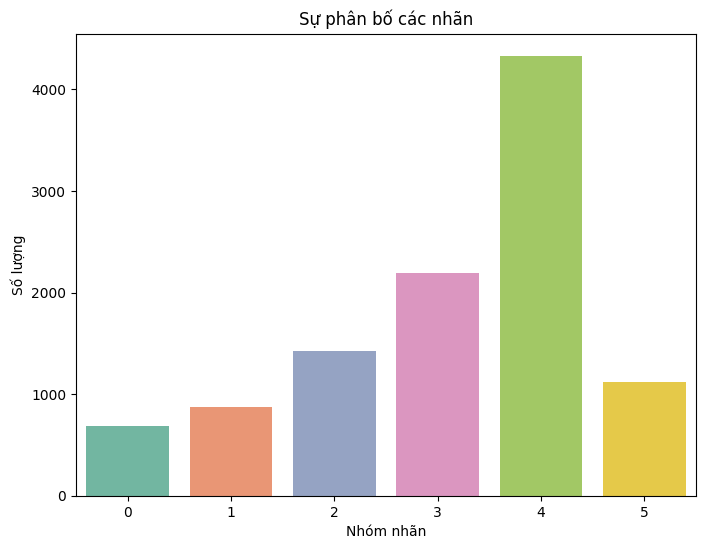

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

In [1]:
label_mapping = {
    0: 'Sad',
    1: 'Angry',
    2: 'Proud',
    3: 'Thankful',
    4: 'Neutral',
    5: 'Insult'
}

In [ ]:
data.to_csv(PATH+ "balanced_data.csv", index=False)

In [4]:
data= pd.read_csv(PATH+ "balanced_data.csv")

In [5]:
data

,label,text,text_length,sentiment
0,2,vị tướng tài_giỏi cao_ráo đẹp_trai nụ cười hiề...,68,POS
1,0,tấn cong và chiến_thắng nhủng mệt lăm các đồng...,53,POS
2,1,vn và vn đánh giết_hại lẫn nhau thật là khủng_...,314,NEG
3,3,34 09 rõ chút chắc thấy được body 6 múi luôn,44,POS
4,3,bác tôi cũng đã ngã xuống ở khe_sanh hoà_bình ...,153,POS
...,...,...,...,...
10618,3,tuyệt_vời cảm_ơn ad nhiều ạ,27,POS
10619,4,chúawibu43 nói_chung chỉ muốn ngồi há miệng ch...,198,NEG
10620,4,không thấy nói đến thương_vong của bộ_đội mk n...,877,NEU
10621,4,ngày_xưa lịch_sử vẻ_vang còn bây_giờ thì có nh...,140,NEU


In [6]:
data['label'] = data['label'].map(label_mapping)

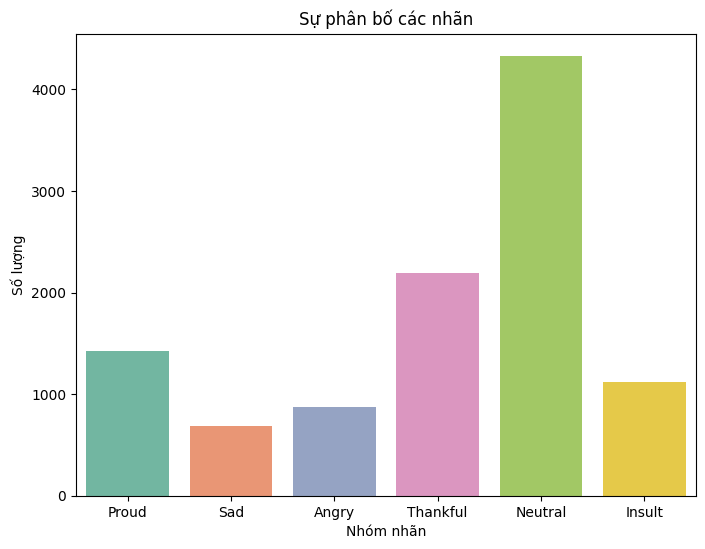

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Sự phân bố các nhãn')
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng')
plt.show()

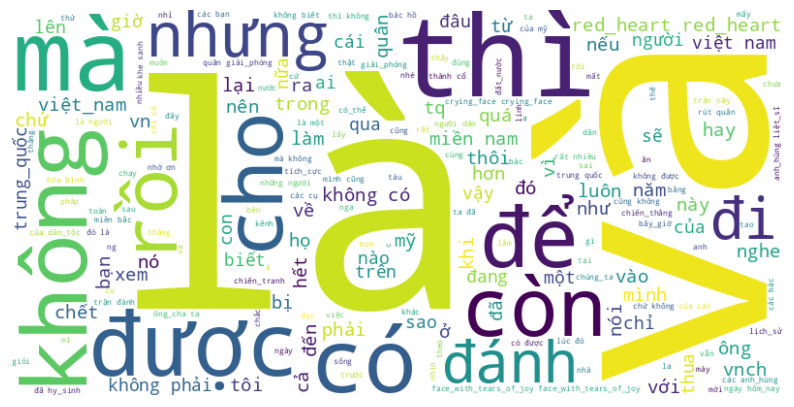

In [9]:
text_data = ' '.join(data['text'])

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

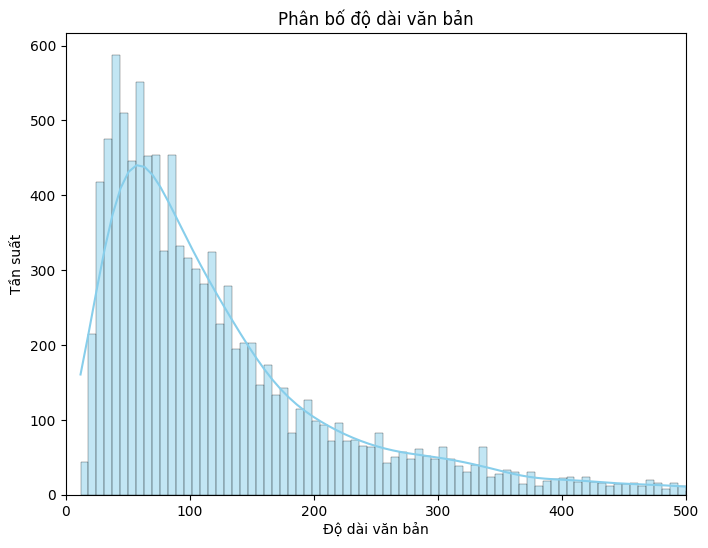

In [10]:
# Thêm một cột mới là độ dài của từng văn bản
data['text_length'] = data['text'].apply(len)

# Vẽ biểu đồ phân bố độ dài văn bản
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'], kde=True, bins=200, color='skyblue')
plt.title('Phân bố độ dài văn bản')
plt.xlim(0, 500)
plt.xlabel('Độ dài văn bản')
plt.ylabel('Tần suất')
plt.show()